In [6]:
# 数组
import numpy as np
# 矩阵
import pandas as pd
#绘图
import matplotlib.pyplot as plt

# 绘图
import seaborn as sns

# scikit作图
# import scikitplot as skplt


In [7]:
data = pd.read_excel('./bcdata.xlsx')
data.head()

,group,age,manarche,men,MBNG,T classifacation,N classifacation,ER status,PR status,Her-2,Ki67
0,1,42,17,0.0,3,2,1,1,1,0,1
1,1,38,13,0.0,2,1,0,1,1,0,2
2,1,51,13,0.0,2,1,1,1,1,0,1
3,2,66,18,1.0,3,2,3,0,0,3,2
4,1,54,13,1.0,3,2,0,0,0,0,2


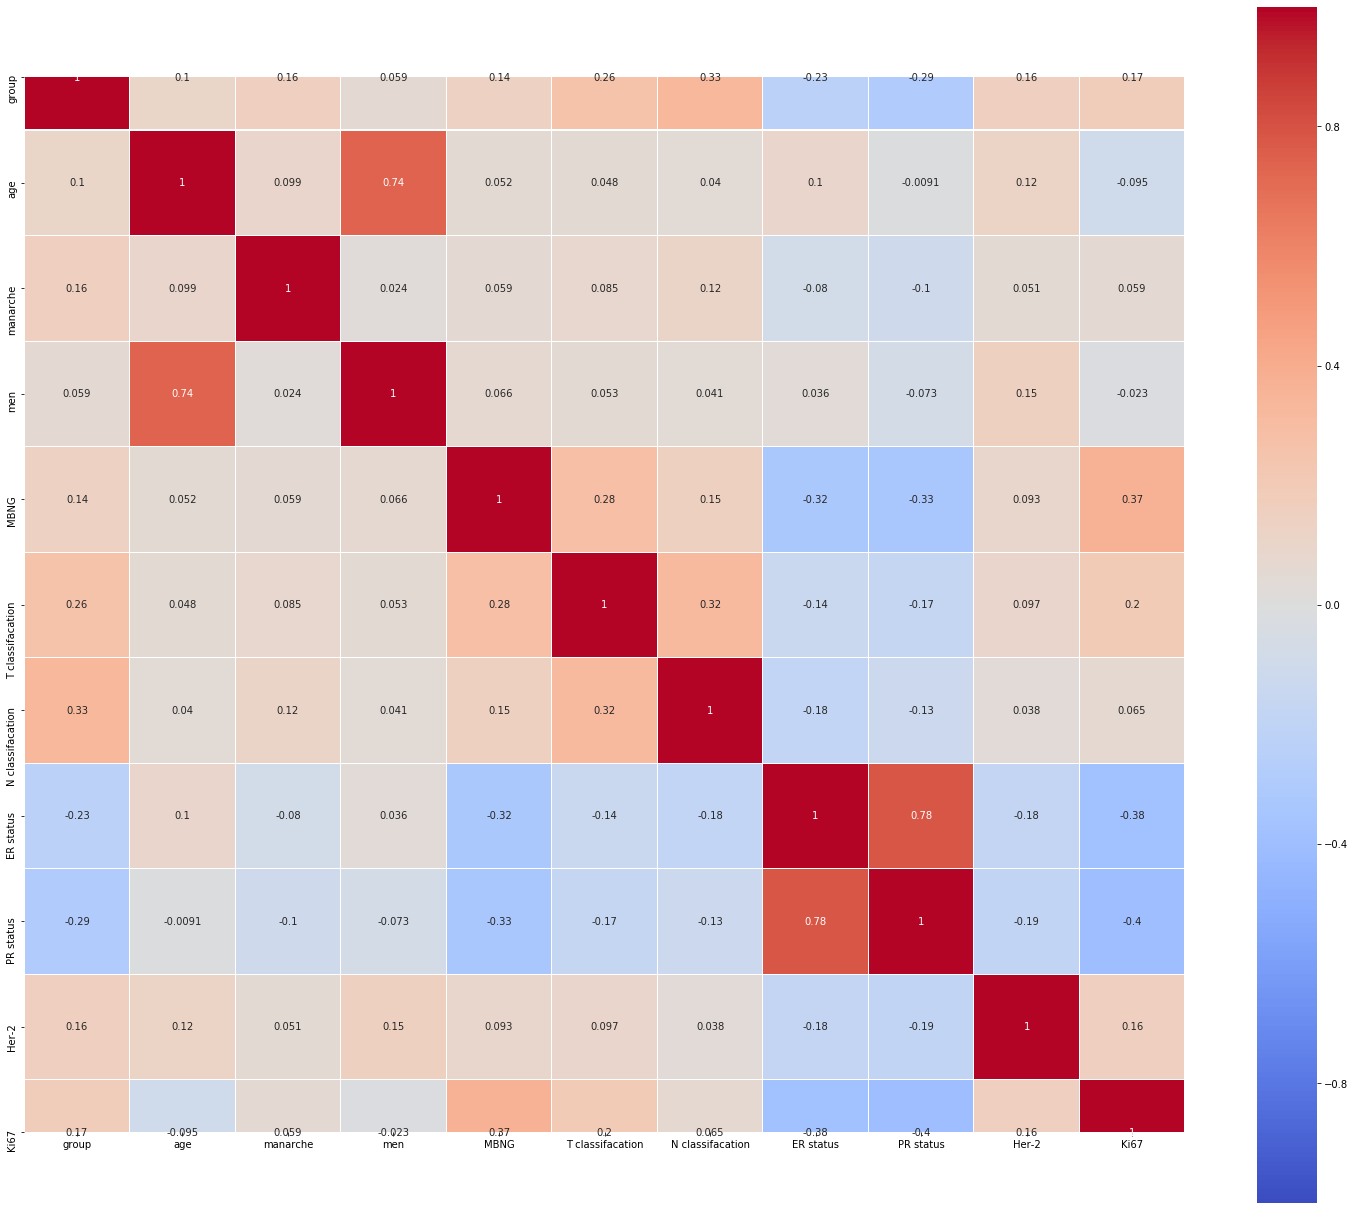

In [8]:
plt.figure(figsize=(26, 22))
sns.heatmap(data.astype(float).corr(), linewidths=0.1, square=True,
            cmap='coolwarm', linecolor='white', annot=True, vmax=1, vmin=-1);

In [178]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import  RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score

seed = 1

X, y = data.values[:,[1,2,4,5,6,7,8,9,10]], data.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# dt = DecisionTreeClassifier()

dt = RandomForestClassifier(random_state=seed)
print(dt)

dt.fit(X_train, y_train)
print (X_train)

# kfold = StratifiedKFold(n_splits=10, random_state=seed)

kfold = KFold(n_splits=10, random_state=seed)

cv_score = cross_val_score(dt, X_train, y_train, cv=kfold)

cv_means = round(cv_score.mean(), 2)
cv_std = round(cv_score.std(), 2)

print (cv_means, cv_std)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
[[60. 13.  3. ...  1.  2.  2.]
 [56. 15.  3. ...  0.  0.  2.]
 [58. 13.  2. ...  0.  3.  2.]
 ...
 [61. 15.  2. ...  1.  0.  1.]
 [41. 16.  3. ...  1.  2.  2.]
 [76. 12.  2. ...  1.  0.  1.]]
0.88 0.09


D:\GitHub\WPy64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [143]:
predicted_probas =dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

NameError: name 'skplt' is not defined

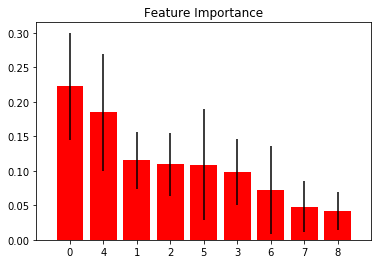

In [6]:
skplt.estimators.plot_feature_importances(dt)
plt.show()

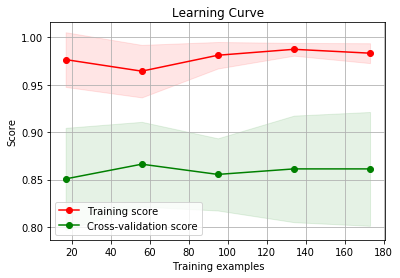

In [7]:
skplt.estimators.plot_learning_curve(dt, X_train, y_train, cv=10)
plt.show()

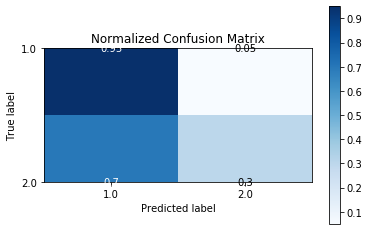

In [8]:
y_pred = dt.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

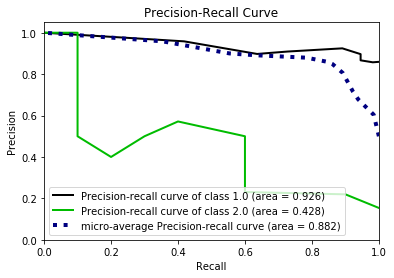

In [9]:
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

In [179]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "D:\GitHub\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D:\GitHub\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "D:\GitHub\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "D:\GitHub\WPy64-3740\python-3.7.4.amd64\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "D:\GitHub\WPy64-3740\python-3.7.4.amd64\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 动态链接库(DLL)初始化例程失败。


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.